In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict
from fancyimpute import BiScaler

ground_truth_df = pd.read_csv('../data/sub1/data_true.txt', sep='\t')
sample_cols = [c for c in ground_truth_df.columns if c.startswith('Sample')]
ground_truth_mat = np.array(ground_truth_df[sample_cols].as_matrix())
ground_truth_normalized = BiScaler().fit_transform(ground_truth_mat)

[BiScaler] Initial log residual value = 15.011116
[BiScaler] Iter 1: log residual = -1.128477, log improvement ratio=16.139594
[BiScaler] Iter 2: log residual = -5.232713, log improvement ratio=4.104235
[BiScaler] Iter 3: log residual = -9.192780, log improvement ratio=3.960067
[BiScaler] Iter 4: log residual = -13.121228, log improvement ratio=3.928449
[BiScaler] Iter 5: log residual = -17.022706, log improvement ratio=3.901478
[BiScaler] Iter 6: log residual = -20.899798, log improvement ratio=3.877092
[BiScaler] Iter 7: log residual = -24.754889, log improvement ratio=3.855091
[BiScaler] Iter 8: log residual = -28.590187, log improvement ratio=3.835298
[BiScaler] Iter 9: log residual = -32.407713, log improvement ratio=3.817526
[BiScaler] Iter 10: log residual = -36.209295, log improvement ratio=3.801582
[BiScaler] Iter 11: log residual = -39.996592, log improvement ratio=3.787297
[BiScaler] Iter 12: log residual = -43.770962, log improvement ratio=3.774370
[BiScaler] Iter 13: log r

In [16]:
mean_prior=[[0, 25]]*80


80

In [43]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import itertools
n_components = 10
max_iter=500000
mean_prior=None
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
gmm = GaussianMixture(n_components=n_components, covariance_type='full',
                              max_iter=max_iter, warm_start=True)
dpgmm = BayesianGaussianMixture(
    n_components=n_components, covariance_type='full', weight_concentration_prior=1e-2,
    weight_concentration_prior_type='dirichlet_process',
    mean_precision_prior=1e-2, mean_prior=mean_prior, covariance_prior=1e0 * np.eye(ground_truth_mat.shape[1]),
    init_params="kmeans", max_iter=max_iter, random_state=42, warm_start=True)

gmm_ground_truth = GaussianMixture(
    n_components=n_components, 
    covariance_type='full', 
    max_iter=max_iter
).fit(ground_truth_mat)
gmm_pred = gmm_ground_truth.predict(ground_truth_mat)


dpgmm_ground_truth = BayesianGaussianMixture(
    n_components=n_components, covariance_type='full', mean_prior=mean_prior,
    weight_concentration_prior=1e-2, 
    weight_concentration_prior_type='dirichlet_process',
    mean_precision_prior=1e-2, covariance_prior=1e0 * np.eye(ground_truth_mat.shape[1]),
    init_params="kmeans", max_iter=max_iter, random_state=2, warm_start=True
).fit(ground_truth_mat)
dpgmm_pred = dpgmm_ground_truth.predict(ground_truth_mat)


normed_gmm_ground_truth = GaussianMixture(
    n_components=n_components, 
    covariance_type='full', 
    max_iter=max_iter
).fit(ground_truth_normalized)
normed_gmm_pred = normed_dpgmm_ground_truth.predict(ground_truth_normalized)



normed_dpgmm_ground_truth = BayesianGaussianMixture(
    n_components=n_components, covariance_type='full', mean_prior=mean_prior,
    weight_concentration_prior=1e-2,
    weight_concentration_prior_type='dirichlet_process',
    mean_precision_prior=1e-2, covariance_prior=1e0 * np.eye(ground_truth_mat.shape[1]),
    init_params="kmeans", max_iter=max_iter, random_state=42, warm_start=True
).fit(ground_truth_normalized)
normed_dpgmm_pred = normed_dpgmm_ground_truth.predict(ground_truth_normalized)



Populating the interactive namespace from numpy and matplotlib


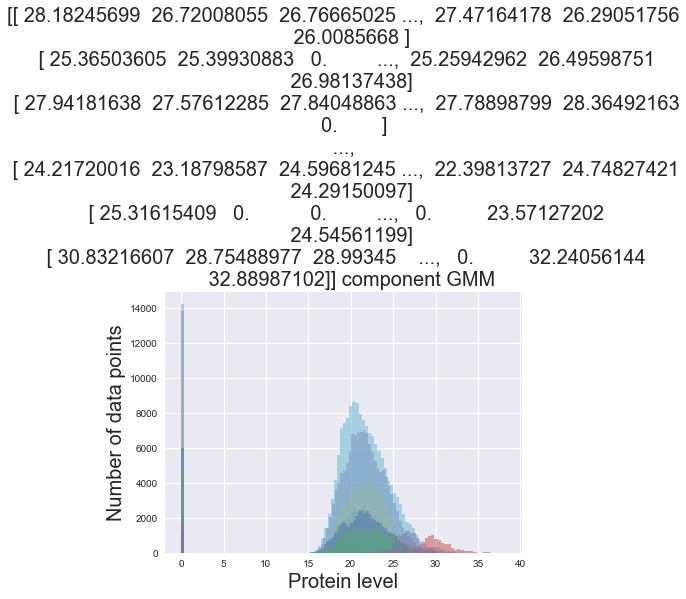

In [47]:
% pylab inline
import seaborn as sns 
fig, ax = plt.subplots(figsize=(6.4, 4.8))
alpha=0.5
ft = 20

for c in range(n_components):
    c = ground_truth_df.loc[np.where(gmm_pred==c)][sample_cols].as_matrix()
    ax.hist(np.reshape(c, np.prod(c.shape)), bins=100, alpha=alpha)

ax.set_title('{} component GMM'.format(c), fontsize=ft)
ax.set_xlabel('Protein level', fontsize=ft)
ax.set_ylabel('Number of data points', fontsize=ft)
ax.set_alpha(0.4)

Populating the interactive namespace from numpy and matplotlib


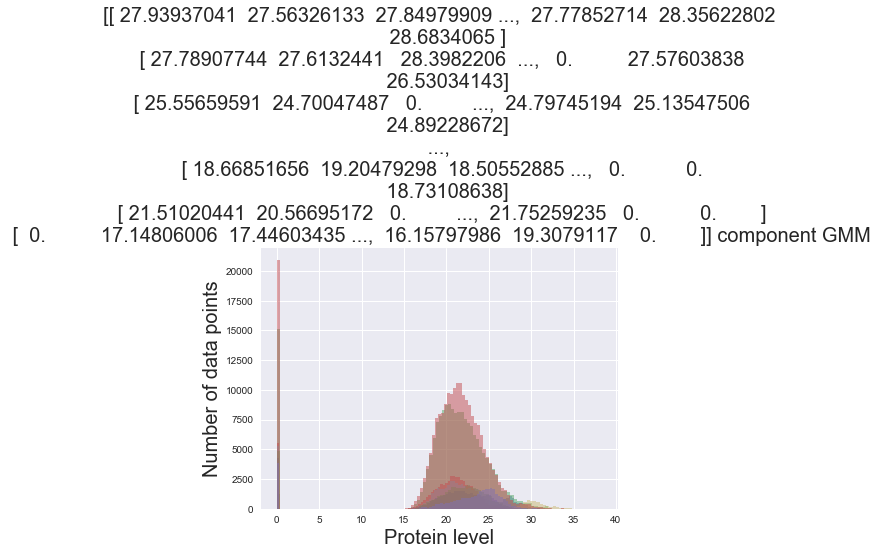

In [45]:
% pylab inline
import seaborn as sns 
fig, ax = plt.subplots(figsize=(6.4, 4.8))
alpha=0.5
ft = 20

for c in range(n_components):
    c = ground_truth_df.loc[np.where(dpgmm_pred==c)][sample_cols].as_matrix()
    ax.hist(np.reshape(c, np.prod(c.shape)), bins=100, alpha=alpha)

ax.set_title('{} component GMM'.format(c), fontsize=ft)
ax.set_xlabel('Protein level', fontsize=ft)
ax.set_ylabel('Number of data points', fontsize=ft)
ax.set_alpha(0.4)

Populating the interactive namespace from numpy and matplotlib


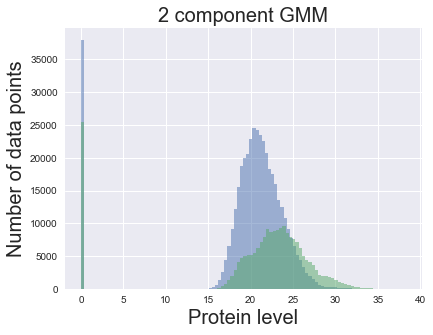

In [24]:
% pylab inline
import seaborn as sns 
fig, ax = plt.subplots(figsize=(6.4, 4.8))
alpha=0.5
ft = 20

c1 = ground_truth_df.loc[np.where(gmm_pred==0)][sample_cols].as_matrix()
c2 = ground_truth_df.loc[np.where(gmm_pred==1)][sample_cols].as_matrix()
ax.hist(np.reshape(c1, np.prod(c1.shape)), bins=100, alpha=alpha)
ax.hist(np.reshape(c2, np.prod(c2.shape)), bins=100, alpha=alpha)
# ax.hist(np.reshape(c3, np.prod(c3.shape)), bins=100, alpha=alpha)
ax.set_title('2 component GMM', fontsize=ft)
ax.set_xlabel('Protein level', fontsize=ft)
ax.set_ylabel('Number of data points', fontsize=ft)

Populating the interactive namespace from numpy and matplotlib


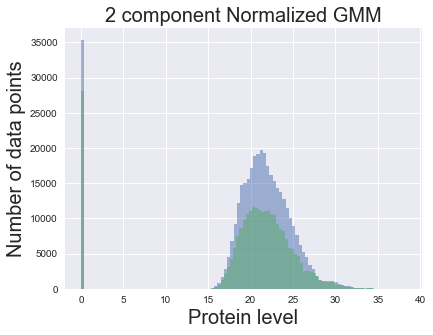

In [25]:
% pylab inline
import seaborn as sns 
fig, ax = plt.subplots(figsize=(6.4, 4.8))
alpha=0.5
ft = 20
c1 = ground_truth_df.loc[np.where(normed_gmm_pred==0)][sample_cols].as_matrix()
c2 = ground_truth_df.loc[np.where(normed_gmm_pred==1)][sample_cols].as_matrix()
# c3 = ground_truth_df.loc[np.where(normed_gmm_pred==2)][sample_cols].as_matrix()
ax.hist(np.reshape(c1, np.prod(c1.shape)), bins=100, alpha=alpha)
ax.hist(np.reshape(c2, np.prod(c2.shape)), bins=100, alpha=alpha)
# ax.hist(np.reshape(c3, np.prod(c3.shape)), bins=100, alpha=alpha)
ax.set_title('2 component Normalized GMM', fontsize=ft)
ax.set_xlabel('Protein level', fontsize=ft)
ax.set_ylabel('Number of data points', fontsize=ft)

Populating the interactive namespace from numpy and matplotlib


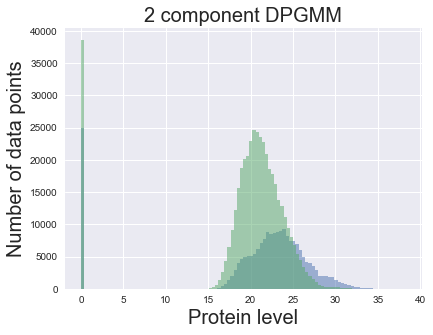

In [26]:
% pylab inline
import seaborn as sns 
fig, ax = plt.subplots(figsize=(6.4, 4.8))
c1 = ground_truth_df.loc[np.where(dpgmm_pred==0)][sample_cols].as_matrix()
c2 = ground_truth_df.loc[np.where(dpgmm_pred==1)][sample_cols].as_matrix()
# c3 = ground_truth_df.loc[np.where(dpgmm_pred==2)][sample_cols].as_matrix()
ax.hist(np.reshape(c1, np.prod(c1.shape)), bins=100, alpha=alpha)
ax.hist(np.reshape(c2, np.prod(c2.shape)), bins=100, alpha=alpha)
# ax.hist(np.reshape(c3, np.prod(c3.shape)), bins=100, alpha=alpha)
ax.set_title('2 component DPGMM', fontsize=ft)
ax.set_xlabel('Protein level', fontsize=ft)
ax.set_ylabel('Number of data points', fontsize=ft)

Populating the interactive namespace from numpy and matplotlib


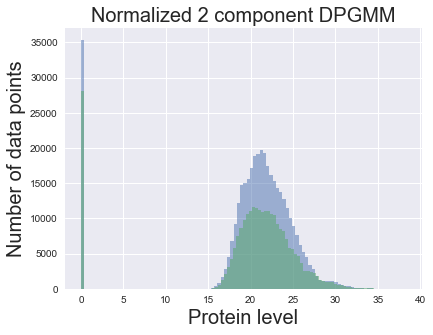

In [27]:
% pylab inline
import seaborn as sns 
fig, ax = plt.subplots(figsize=(6.4, 4.8))
c1 = ground_truth_df.loc[np.where(normed_dpgmm_pred==0)][sample_cols].as_matrix()
c2 = ground_truth_df.loc[np.where(normed_dpgmm_pred==1)][sample_cols].as_matrix()
ax.hist(np.reshape(c1, np.prod(c1.shape)), bins=100, alpha=alpha)
ax.hist(np.reshape(c2, np.prod(c2.shape)), bins=100, alpha=alpha)
ax.set_title('Normalized 2 component DPGMM', fontsize=ft)
ax.set_xlabel('Protein level', fontsize=ft)
ax.set_ylabel('Number of data points', fontsize=ft)